In [1]:
import pandas as pd
import time
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
def save(df):
    ts = int(time.time())
    df.to_excel("./files/{}.xlsx".format(ts))
    print(str(ts)+".xlsx has been saved")

In [3]:
df = pd.read_csv("./data/sample.csv",delimiter=",",dtype=str)
print(df.shape)

(21098, 33)


In [4]:
df.columns

Index(['id', 'tweet_id', 'username', 'followers_count', 'user_verified',
       'text', 'created_at', 'like_count', 'retweet_count', 'reply_count',
       'location', 'lang', 'generation', 'ass_hashtags', 'keyword_exists',
       'prep_text', 'year', 'month', 'day', 'week', 'time', 'hour', 'minute',
       'vader_polarity', 'bert_polarity', 'date', 'city', 'district',
       'province', 'country', 'quater', 'weekday', 'tweet_lang'],
      dtype='object')

In [5]:
df[['year','week']].sample(5)

,year,week
1459,2021,32.0
12710,2021,14.0
6954,2021,29.0
16359,2020,25.0
19103,2019,3.0


In [6]:
df.sample(5).T

,17973,4164,13454,16190,260
id,69839,11533,64989,67883,11097
tweet_id,1219689849785143297,1424988939736264715,1357605294344462337,1280076329334030337,1425430886129020930
username,Peter_S_Becks94,HungryLionZM,RHaloba,MonicaEisenberg,AfricanLiberals
followers_count,1477.0,16023.0,129.0,10776.0,3437.0
user_verified,False,False,False,False,False
text,Opposition and independent MPs shouldn't move ...,"Zed, where is your voting card? It's time to m...",@ZambiaElections @Mulenga09820858 Does the ins...,Commissioner of Prisons says Opposition partie...,"Good luck to our #ALNmember, @UPNDZM under the..."
created_at,2020-01-21 20:34:55+02:00,2021-08-10 09:00:12+02:00,2021-02-05 10:21:39+02:00,2020-07-06 11:49:14+02:00,2021-08-11 14:16:21+02
like_count,1.0,102.0,0.0,0.0,55.0
retweet_count,1.0,17.0,0.0,0.0,10.0
reply_count,0.0,9.0,1.0,0.0,1.0


## Tweet Volume

### Yearly Distribution of Tweets

In [7]:
lst_year = list(df['year'].unique())
dict_year = {}

for y in lst_year:
    count = df.query("year == '{}'".format(y)).shape[0]
    dict_year[y] = count

dict_year

{'2021': 10112,
 '2020': 6410,
 '2019': 1211,
 '2018': 1532,
 '2017': 759,
 '2016': 1074}

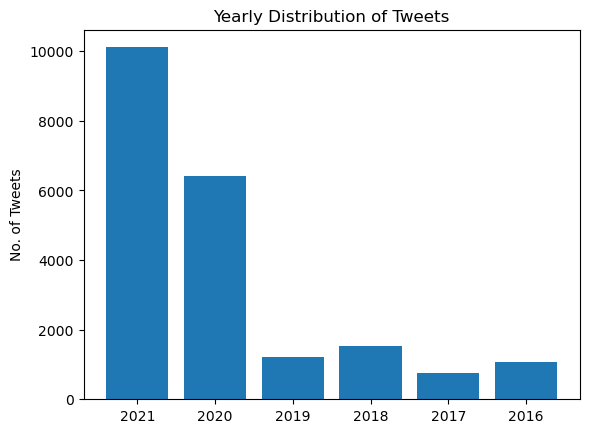

In [8]:
plt.bar(range(len(dict_year.keys())), dict_year.values())
plt.title("Yearly Distribution of Tweets")
plt.ylabel("No. of Tweets")
plt.xticks(range(len(dict_year.keys())), dict_year.keys())
plt.show()

### Quarterly Tweet Volume

In [9]:
def get_tweets_per_quarter(year,quarter):
    x = df.query("year == '{}' and quater == '{}'".format(year,quarter))
    return x.shape[0]

In [64]:
lst_years = list(df['year'].unique())
lst_quater = list(df['quater'].unique())
dict_count_tweets = {}

for y in lst_years:
    for q in lst_quater:
        count = get_tweets_per_quarter(y,q)
        dict_id = 'yr'+y+"_qr"+q
        dict_count_tweets[dict_id] = {
            'year' : y,
            'quarter': q,
            'count' : count
        }
        #print("Year {}, Quarter {} has {}  tweets".format(y,q,count))


### Month Tweet Distribution

In [11]:
import calendar

def convert_number_to_month(num):
    return calendar.month_name[int(num)]

df['month_text'] = df['month'].apply(convert_number_to_month)

def get_tweets_per_month(year,month_text):
    x = df.query(" year == '{}' and month_text == '{}'".format(year,month_text))
    return x.shape[0]

In [12]:
get_tweets_per_month(2021,"August")

4739

In [13]:
lst_years = list(df['year'].unique())
lst_month_text = list(df['month_text'].unique())
lst_months_tweets = []

for y in lst_years:
    for m in lst_month_text:
        count = get_tweets_per_month(y,m)
        lst_months_tweets.append((y,m,count))
        
lst_months_tweets.sort(key = lambda i:i[2], reverse = True)
pd.DataFrame(lst_months_tweets,columns=["year","month","count"]).shape

(72, 3)

In [14]:
save(pd.DataFrame(lst_months_tweets,columns=["year","month","count"]))

1697643649.xlsx has been saved


In [15]:
max(lst_months_tweets, key=lambda tup: tup[2])

('2021', 'August', 4739)

In [16]:
lst_month = list(df['month_text'].unique())
lst_months_tweets = []

for m in lst_month:
    count = df.query("month_text == '{}'".format(m)).shape[0]
    lst_months_tweets.append((m,count))

lst_months_tweets

[('August', 5382),
 ('May', 1291),
 ('December', 1417),
 ('July', 2462),
 ('June', 1940),
 ('April', 925),
 ('March', 1126),
 ('February', 1086),
 ('January', 1666),
 ('November', 1402),
 ('October', 993),
 ('September', 1408)]

In [17]:
lst_months_tweets[0]

('August', 5382)

### Weekday Tweet Distribution

In [18]:
def get_tweets_per_week(year,week_num):
    week_num = float(week_num)
    x = df.query(" year == '{}' and week == '{}'".format(year,week_num))
    return x.shape[0]

In [19]:
lst_years = list(df['year'].unique())
lst_weeks = list(df['week'].unique())
lst_week_tweets = []

for y in lst_years:
    for w in lst_weeks:
        count = get_tweets_per_week(y,w)
        w = int(float(w))
        lst_week_tweets.append((y,w,count))

lst_week_tweets.sort(key = lambda i:i[2], reverse = True)
temp = pd.DataFrame(lst_week_tweets,columns=["year","week","count"])
#save(temp)
temp.head(5)


,year,week,count
0,2021,32,2634
1,2021,31,1927
2,2021,30,653
3,2016,51,526
4,2020,46,496


In [20]:
lst_weekdays = list(df['weekday'].unique())
dict_weekday = {}
for w in lst_weekdays:
    count = df.query("weekday == '{}'".format(w)).shape[0]
    dict_weekday[w] = count

dict_weekday

{'Friday': 2948,
 'Wednesday': 4405,
 'Tuesday': 3494,
 'Monday': 3409,
 'Sunday': 1971,
 'Saturday': 2040,
 'Thursday': 2831}

### Daily Tweet Distribution

In [21]:
df['date']=pd.to_datetime(df['created_at']).dt.date
df.date.sample(5)

18587    2019-10-23
8835     2020-10-17
14357    2020-11-10
15349    2020-09-21
5778     2020-09-18
Name: date, dtype: object

In [22]:
date_str = "2013-01-01"
temp_df = pd.DataFrame({"date": [date_str]})
pd.to_datetime(temp_df['date']).dt.date

0    2013-01-01
Name: date, dtype: object

In [23]:
#Date format (yyyy-mm-dd)
"""def get_tweets_per_day(date_str):
    temp_df = pd.DataFrame({"date": [date_str]})
    date = pd.to_datetime(temp_df['date']).dt.date[0]
    return df.loc[(df['date']==date)].shape[0]"""

def get_tweets_per_day(year,month,day):
    x = df.query("year == '{}' and month == '{}' and day == '{}'".format(year,month,day))
    return x.shape[0]

get_tweets_per_day(2021,8,7)

229

In [24]:
def get_str_date(date_obj):
    return date_obj.strftime("%Y-%m-%d")

df['date_str'] = df['date'].apply(get_str_date)

In [26]:
lst_years = df['year'].unique()
lst_months = df['month'].unique()
lst_days = df['day'].unique()

lst_day_tweets = []

for y in lst_years:
    for m in lst_months:
        for d in lst_days:
            count = get_tweets_per_day(y,m,d)
            lst_day_tweets.append((y,m,d,count))
            
lst_day_tweets.sort(key = lambda i:i[3], reverse = True)
temp = pd.DataFrame(lst_day_tweets,columns=["year","month","day","count"])
#save(temp)
temp.head(5)

,year,month,day,count
0,2021,8,11,1469
1,2021,8,10,724
2,2016,12,19,517
3,2021,8,9,441
4,2021,8,6,356


In [27]:
temp = df.value_counts(subset=['date_str'])
temp_df = pd.DataFrame(list(zip([t[0] for t in temp.index],list(temp.values))), columns = ["date","count"])
save(temp_df)

1697643688.xlsx has been saved


In [28]:
#dailly tweet mean
int(temp_df['count'].mean())

13

# Country based Dsitribution

In [29]:
temp = df.value_counts(subset=['country'])
#temp['country'] = temp['country'].replace(['Africa'], 'Other')
temp_df = pd.DataFrame(zip([t[0] for t in temp.index],temp.values), columns = ["country","count"])
temp_df.shape

(101, 2)

In [30]:
temp_df.head(6)

,country,count
0,Zambia,10264
1,United States,559
2,South Africa,511
3,United Kingdom,371
4,Africa,346
5,Zimbabwe,345


In [31]:
df['country'].nunique()

101

In [37]:
df_zambian_tweets = df.query(" country == '{}'".format("Zambia"))
df_zambian_tweets.shape

(10264, 35)

In [48]:
df_zambian_tweets["province"].fillna("Not Specified", inplace = True)

df_zambian_tweets['province'] = df_zambian_tweets['province'].replace(['Kapiri Mposhi District'], 'Central Province')
df_zambian_tweets['province'] = df_zambian_tweets['province'].replace(['Ndola District'], 'Copperbelt Province')
df_zambian_tweets['province'] = df_zambian_tweets['province'].replace(['Kitwe District'], 'Copperbelt Province')
df_zambian_tweets['province'] = df_zambian_tweets['province'].replace(['Lusaka District'], 'Lusaka Province')

#provinces = df_zambian_tweets['province'].unique()
df_zambian_tweets.shape

/tmp/ipykernel_9514/3066072727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zambian_tweets["province"].fillna("Not Specified", inplace = True)
/tmp/ipykernel_9514/3066072727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zambian_tweets['province'] = df_zambian_tweets['province'].replace(['Kapiri Mposhi District'], 'Central Province')
/tmp/ipykernel_9514/3066072727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

(10264, 35)

In [49]:
temp = df_zambian_tweets.value_counts(subset=['province'])
#temp['country'] = temp['country'].replace(['Africa'], 'Other')
temp_df = pd.DataFrame(zip([t[0] for t in temp.index],temp.values), columns = ["province","count"])
temp_df.shape

(11, 2)

In [50]:
df_zambian_tweets.value_counts(subset=['province'])

province              
Lusaka Province           5056
Not Specified             4132
Copperbelt Province        732
Southern Province          118
Northern Province          112
Central Province            39
Eastern Province            23
North-Western Province      23
Western Province            12
Muchinga Province           11
Luapula Province             6
dtype: int64

In [41]:
save(temp_df)

1697649461.xlsx has been saved


### Followership  distrbution

In [52]:
temp = df.value_counts(subset=['username'])
temp_df = pd.DataFrame(list(zip([t[0] for t in temp.index],list(temp.values))), columns = ["username","count"])
temp_df.head()

,username,count
0,ZMPolitics,1371
1,ZambiaElections,1187
2,Peter_S_Becks94,894
3,2021Zambian,562
4,Patlups,421


In [59]:
#Top follower daily tweeting rate
df_top_follower = df.query("username == '{}'".format("ZMPolitics"))
lst_days = list(df_top_follower['date_str'].unique())
tweet_rate =round(df_top_follower.shape[0]/ len(lst_days),0)
tweet_rate

9.0

In [61]:
len(lst_days)

158

In [63]:
round(df_top_follower.shape[0])

1371

In [76]:
df_users = df['username'].unique()
lst_user_tweet_pattern = []

for u in df_users:
    df_twitter = df.query("username == '{}'".format(u))
    lst_days = list(df_twitter['date_str'].unique())
    tweet_rate =round(int(df_twitter.shape[0])/ len(lst_days),0)
    
    lst_user_tweet_pattern.append((u, str(len(lst_days)), str(df_twitter.shape[0]),str(tweet_rate)))


In [77]:
lst_user_tweet_pattern.sort(key = lambda i:i[3], reverse = True)
x = pd.DataFrame(lst_user_tweet_pattern,columns=["username","num_days","num_tweets","tweet_avg"])
x.head()

,username,num_days,num_tweets,tweet_avg
0,LynneStactia,1,9,9.0
1,ZMPolitics,158,1371,9.0
2,mpelembe,5,38,8.0
3,Kamukwape,1,8,8.0
4,abel_fumpa,1,8,8.0
